그 동안은 X데이터에 대해 Y데이터가 주어진 경우에 대해서 이를 예측하거나, 분류하는 모델들을 주구장창 만들었는데, 이처럼 Y가 주어진 경우의 데이터를 Labeled 되어있다고 한다. 즉, 어떤 걸 맞춰야 하는지가 정해져있는 데이터를 가지고 학습을 하는 이런 종류를 Supervised Learning(지도학습) 이라고 하며, 이런 경우 목적함수(Objetive function) - 즉 손실은 쉽게 정의 된다. y를 최대한 가깝게 묘사하는 것 (주로 MSE나 Cross Entropy)

그런데 이번에는 X만 가지고 학습을 해보자, 주어진 데이터를 엄청 축소시켰다가 (인코딩) 다시 원복을 시킨다 (디코딩), 이 과정을 통해서 제대로 인코딩-디코딩이 된다면, 인코딩 된 (축소된) 값만 가지고도 얼마든지 처음 X값을 묘사할 수 있다. 이걸 일종의 압축 또는 Feature extraction에 활용한다는 컨셉이 바로 오토인코더다. 백문이 불여일견 간단히 실습해보자

In [7]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

이번에는 y_train, y_test 는 사용하지 않기 때문에 x data 들만 전처리를 해준다 (0~1) 사이로 스케일링

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

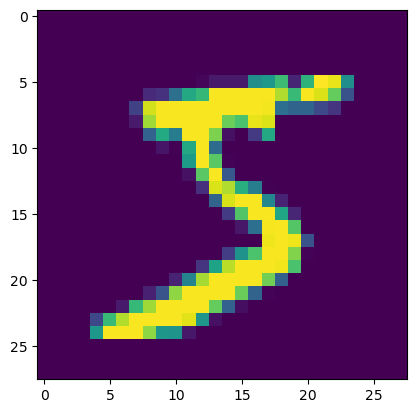

In [11]:
plt.imshow(x_train[0])

아주 간단하게 모델을 만들어보자. 

In [50]:
simple_autoencoder = keras.Sequential()
simple_autoencoder.add( keras.layers.InputLayer(shape=(28,28)))
simple_autoencoder.add( keras.layers.Flatten())
simple_autoencoder.add( keras.layers.Dense(5))
simple_autoencoder.add( keras.layers.Dense(784, activation='sigmoid'))
simple_autoencoder.add( keras.layers.Reshape(target_shape=(28, 28)))
simple_autoencoder.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,629 (33.71 KB)

 Trainable params: 8,629 (33.71 KB)

 Non-trainable params: 0 (0.00 B)

먼저 이미지의 모양이 28*28 이므로 인풋을 정의해주고, 이를 Fully Connected 하기 위해 Flatten 으로 일직선으로 펴준다. 그리고 32개 node로 압축을 시키고(Encode) 이를 다시 784개로 다시 늘려준다 (Decode). 그리고 처음 들어간 값이 0~1 로 스케일링 해줬었기 때문에, 출력도 0~1의 값이 나오도록 sigmoid 를 activation 함수로 지정해줬다. 그리고 최종적으로 들어간 값과 모양이 같게 만들기 위해서 (28, 28) 사이즈가 되도록 reshape까지 해줬다.  

이제 들어간 이미지와 압축후 나온 이미지의 모양이 같도록 (각 pixel 마다 delta가 최소가 되도록) 학습을 한다. 사실 여기서는 어떤종류의 Loss 를 사용해도 input 과 값이 비슷해지길 원하는 쪽으로 학습만 되면 되기 때문에 다른 많은 예제에서는 binary cross entropy를 쓰기도 한다.

In [51]:
simple_autoencoder.compile( optimizer='adam', loss = 'mse')

In [52]:
simple_autoencoder.fit( x = x_train, y = x_train, epochs=10, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 619us/step - loss: 0.0791 - val_loss: 0.0461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - loss: 0.0457 - val_loss: 0.0439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - loss: 0.0439 - val_loss: 0.0430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - loss: 0.0432 - val_loss: 0.0425
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - loss: 0.0428 - val_loss: 0.0423
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 0.0427 - val_loss: 0.0421
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 0.0425 - val_loss: 0.0421
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 0.0425 - val_loss: 0.0420
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 0.0424 - val_loss: 0.0419
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - loss: 0.0424 - val_loss: 0.0419


fit 을 진행할 때, x, y 위치에 어떤 값이 들어가는지 주의해서 확인해보자! (input 을 그대로 줬다.)

뭔가 학습이 되었는데, 제대로 된건지 확인이 필요하다. 이를 위해서 집어넣기 전 이미지와 집어넣고 나온 이미지를 비교해보자

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
0


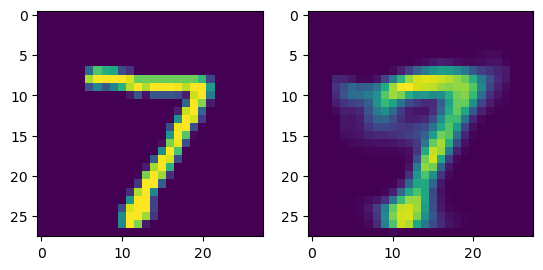

1


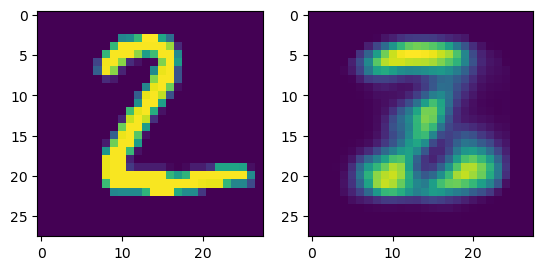

2


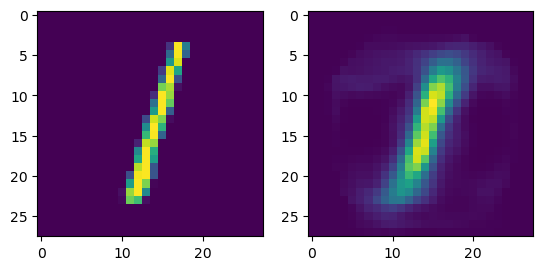

3


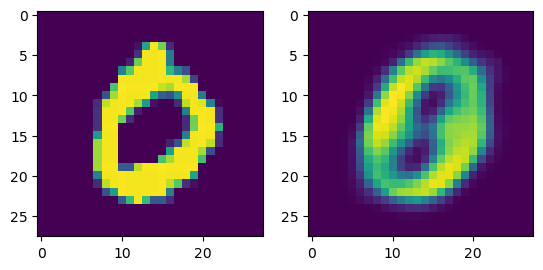

4


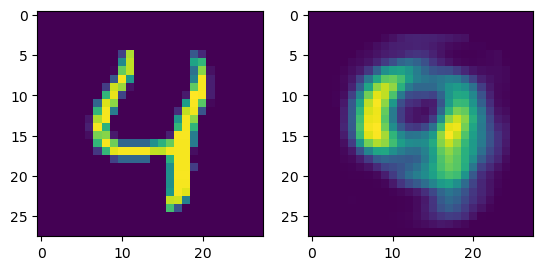

In [59]:
x_test_decoded = simple_autoencoder.predict(x_test)
for i in range(5):
    print(i)
    plt.subplot(1, 2, 1)
    plt.imshow( x_test[i])
    plt.subplot(1, 2, 2)
    plt.imshow( x_test_decoded[i])
    plt.show()
    plt.close()

 왼쪽이 실제 test에 사용된 이미지(학습에 사용되지 않았던) 원본이고, 오른쪽이 압축되었다가 다시 복원된 이미지이다. 확실히 784개의 pixel 을 단 5개만으로 압축했다가 다시 복구했더니 정보 손실이 좀 있다. 그럼 encoding dimmension을 조금 올려서 다시 돌려보면 (그리고 조금 더 깊게 쌓아보면)

In [61]:
simple_autoencoder2 = keras.Sequential()
simple_autoencoder2.add( keras.layers.InputLayer(shape=(28,28)))
simple_autoencoder2.add( keras.layers.Flatten())
simple_autoencoder2.add( keras.layers.Dense(32))
simple_autoencoder2.add( keras.layers.Dense(16))
simple_autoencoder2.add( keras.layers.Dense(32))
simple_autoencoder2.add( keras.layers.Dense(784, activation='sigmoid'))
simple_autoencoder2.add( keras.layers.Reshape(target_shape=(28, 28)))


In [62]:
simple_autoencoder2.compile( optimizer='adam', loss = 'mse')
simple_autoencoder2.fit( x = x_train, y = x_train, epochs=10, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - loss: 0.0532 - val_loss: 0.0243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 0.0237 - val_loss: 0.0216
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 0.0221 - val_loss: 0.0212
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - loss: 0.0217 - val_loss: 0.0210
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - loss: 0.0215 - val_loss: 0.0209
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - loss: 0.0212 - val_loss: 0.0205
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - loss: 0.0211 - val_loss: 0.0205
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - loss: 0.0208 - val_loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - loss: 0.0207 - val_loss: 0.0203
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - loss: 0.0208 - val_loss: 0.0203


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
0


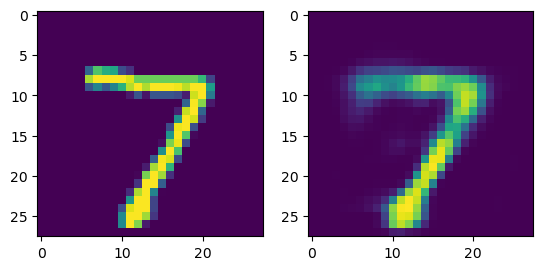

1


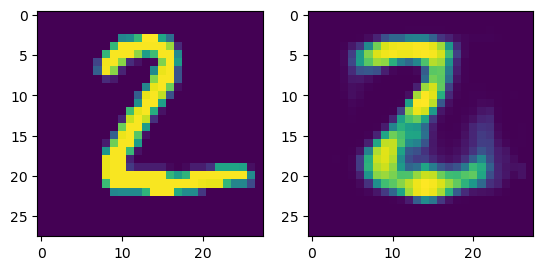

2


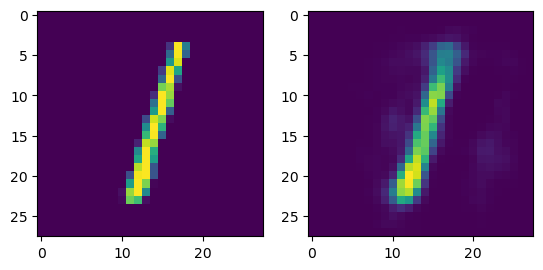

3


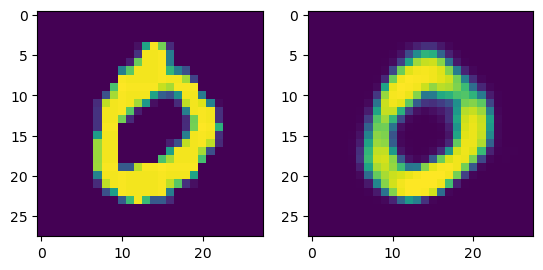

4


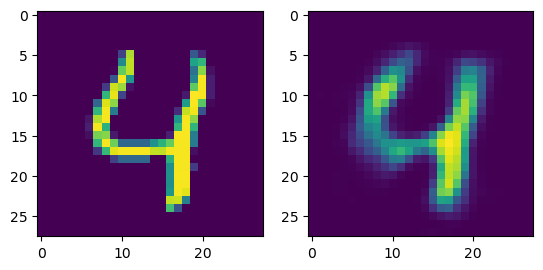

In [63]:
x_test_decoded = simple_autoencoder2.predict(x_test)
for i in range(5):
    print(i)
    plt.subplot(1, 2, 1)
    plt.imshow( x_test[i])
    plt.subplot(1, 2, 2)
    plt.imshow( x_test_decoded[i])
    plt.show()
    plt.close()

약간의 뭉게짐은 보이지만, 그럼에도 불구하고 어느정도 원본이 거의 그대로 만들어짐을 알 수 있다. 즉 이제 이 Decoder만 있으면 손글씨 이미지의 경우 28*28 의 이미지를 다 보관하지 않고, 단 16개의 Feature값만 있어도 원래 모습을 거의 그대로 복원할 수 있게 되었다. 

따라서 이렇게 줄여진 16개의 값은 손글씨를 이루는 가장 중요한 Feature가 되는 것이고 원본데이터의 핵심적인 특징을 가지고 있다. 특히나 지금처럼 그냥 Dense Layer를 엮어서 만든 Auto Encoder의 경우에는 사실 주성분 분석(PCA)와 실제로 닮아 있을 뿐 아니라 수식적으로도 사실상 유사한데, 이 부분은 일단 당장은 Skip.


그런데 지금 구현한 Auto Encoder의 경우에는 통짜로 만들어져 있기 때문에 (Sequetial 을 통해서 한번에 줄었다가 늘렸다가를 하기 때문에) 실제로 그 Featuer가 무엇인기 궁금하다. 따라서 Auto Encoder의 인코딩 부분과 디코딩 부분을 각각 따로 만들면 더 유리할 것 같다. 이를 위해서는 조금 복잡한 테크닉을 써야한다.

이를 위해서 Keras에서는 클래스형 / 함수형 API 를 지원하는데, 함수형의 경우 여러가지 예제가 많으니까 여기서는 클래스형 모델을 사용해서 오토인코더를 각각 구현해보도록 하겠다.

In [106]:
# keras에서 기본으로 제공하는 Model 을 상속 받아서 사용
from keras import Model

class Autoencoder(Model):
  def __init__(self): # 초기화 
    super(Autoencoder, self).__init__() # 부모의 초기화 루틴 사용

    self.encoder = keras.Sequential()
    self.encoder.add( keras.layers.Flatten())
    self.encoder.add( keras.layers.Dense(32, activation='relu'))
    self.encoder.add( keras.layers.Dense(8, activation='relu')) 
    
    self.decoder = keras.Sequential()
    self.decoder.add( keras.layers.Dense(32, activation='relu'))
    self.decoder.add( keras.layers.Dense(784, activation='sigmoid'))
    self.decoder.add( keras.layers.Reshape(target_shape=(28,28)))
  
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



사실 파이썬 문법을 조금 활용했을 뿐 크게 달라진게 없다. 전에는 Sequential 이라는 모델로 한번에 학습하던 걸, 2개로 나눠서 학습하는 것만 다르다

In [107]:
autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')


In [108]:
autoencoder.fit(x=x_train, y=x_train, epochs=10 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - loss: 0.0626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - loss: 0.0346
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - loss: 0.0307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - loss: 0.0289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - loss: 0.0282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - loss: 0.0274
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - loss: 0.0268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - loss: 0.0265
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - loss: 0.0264
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - loss: 0.0262


학습하는 명령어와 과정은 완전히 동일하다. (겁낼필요가 없다!!) - 그리고 사실 개인적으로는 함수형보다 이런 클래스형이 더 깨끗해보이기도 해서 선호한다. 그리고 이렇게 모델을 상속받아서 구현하면 좀 복잡한 형태의 모델링도 가능할 뿐 아니라 아래와 같이 인코딩 부분과 디코딩 부분을 각각 호출할 수 도 있다.

In [110]:
encoded_imgs = autoencoder.encoder(x_test)
decoded_imgs = autoencoder.decoder(encoded_imgs)

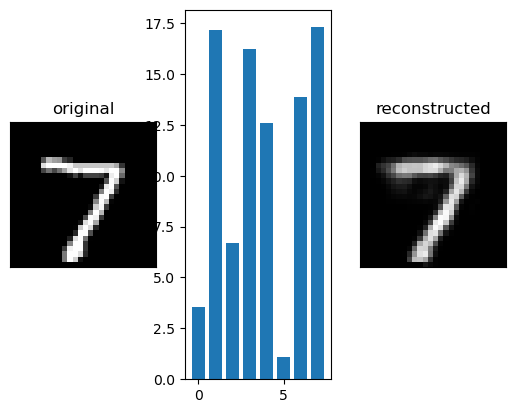

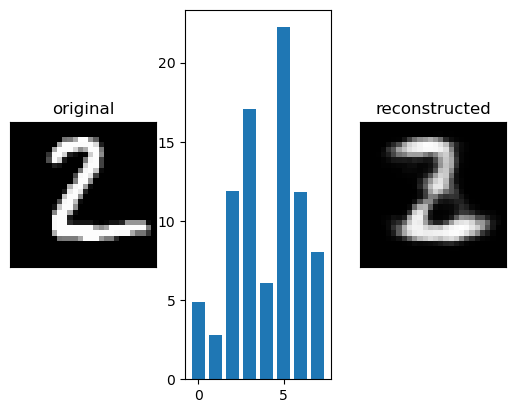

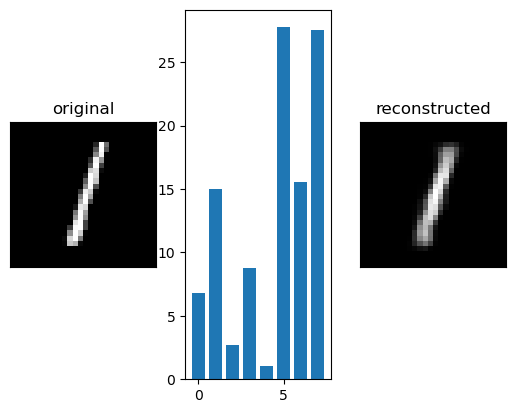

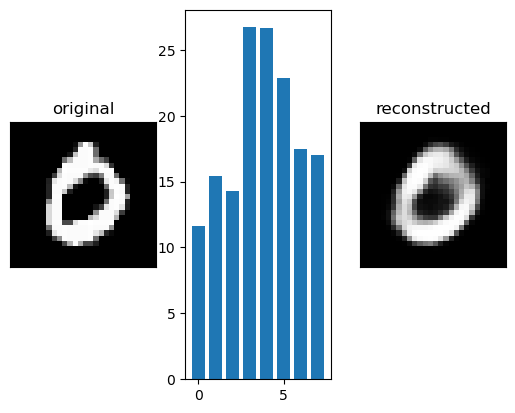

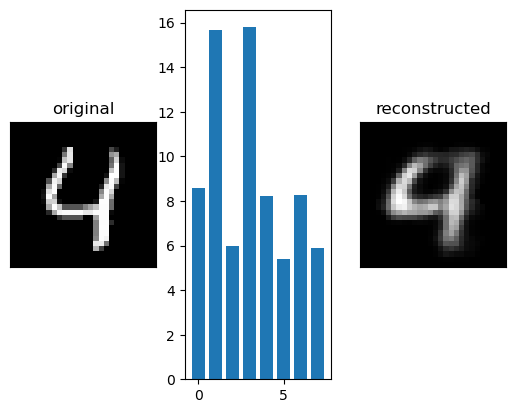

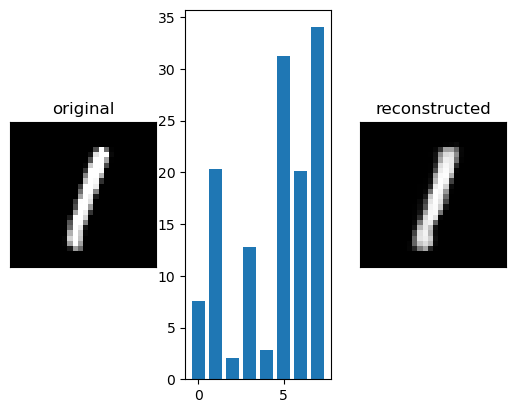

In [112]:
n = 6
for i in range(n):
  # display original
  ax = plt.subplot(1, 3, 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(1, 3, 2)
  plt.bar( range(8),  encoded_imgs[i] )

  # display reconstruction
  ax = plt.subplot(1, 3, 3)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()




위를 보면, 왼쪽이 original image (input으로 넣은 것) <br>
중간이 8개의 차원으로 압축된 Feature
그리고 오른쪽이 다시 복원된 output image 이다. 

이걸 좀 더 직관적으로 확인해보기 위해서 Test set중에서 1과 8의 차이를 확인해보자

In [146]:
x_test_1 = x_test[y_test == 1]
x_test_6 = x_test[y_test == 6]

In [147]:
encoded_imgs_1 = autoencoder.encoder(x_test_1)
decoded_imgs_1 = autoencoder.decoder(encoded_imgs_1)

encoded_imgs_6 = autoencoder.encoder(x_test_6)
decoded_imgs_6 = autoencoder.decoder(encoded_imgs_6)



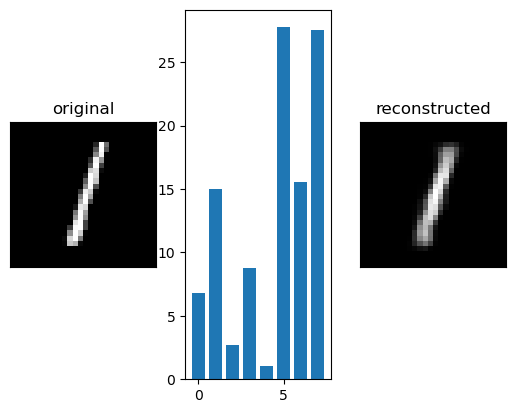

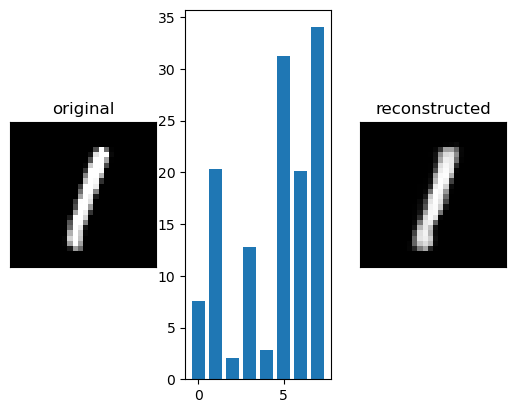

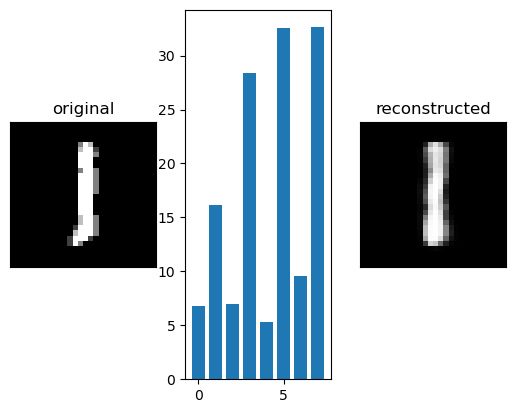

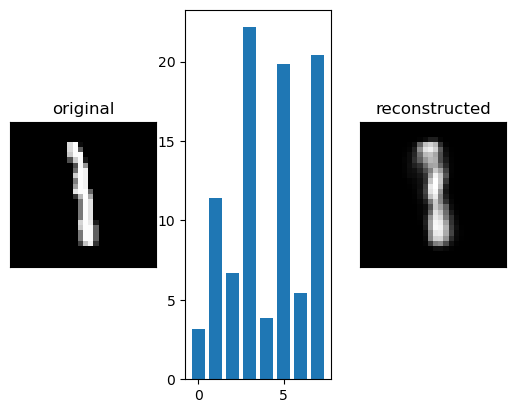

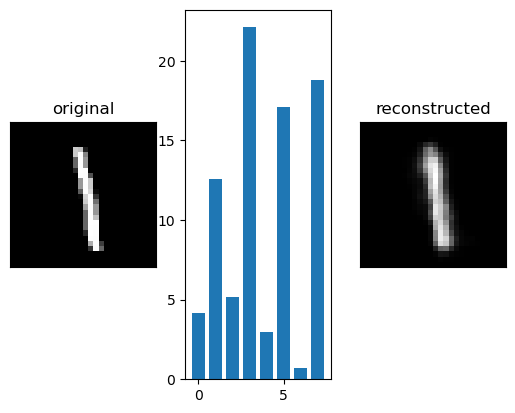

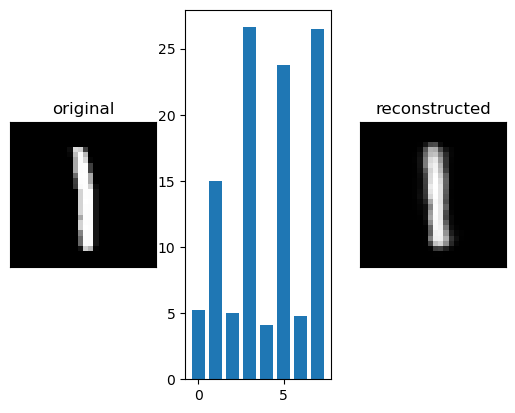

In [148]:
n = 6
for i in range(n):
  # display original
  ax = plt.subplot(1, 3, 1)
  plt.imshow(x_test_1[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(1, 3, 2)
  plt.bar( range(8),  encoded_imgs_1[i] )

  # display reconstruction
  ax = plt.subplot(1, 3, 3)
  plt.imshow(decoded_imgs_1[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()




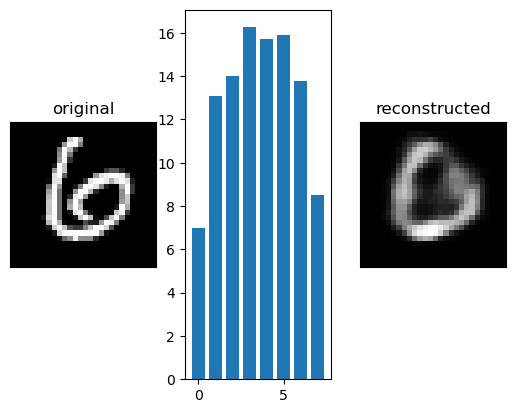

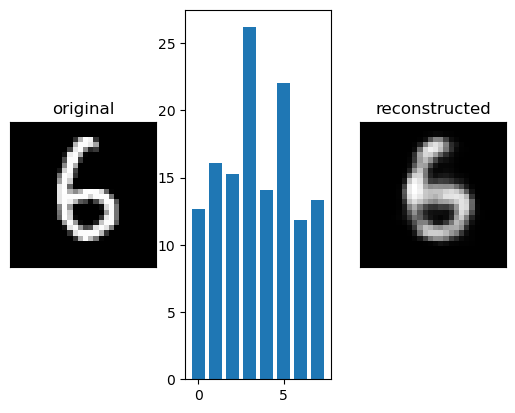

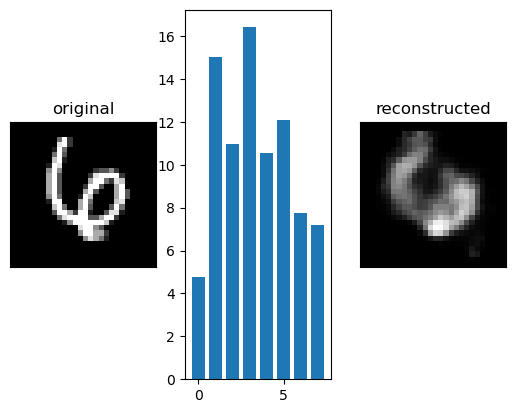

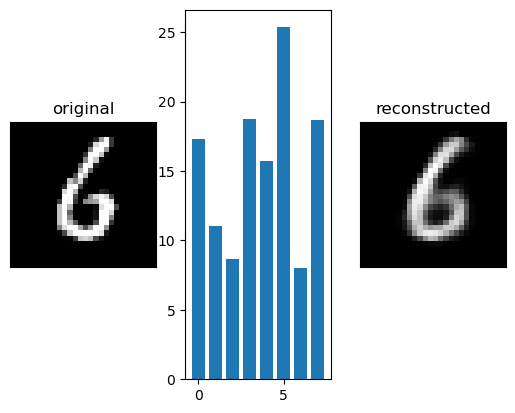

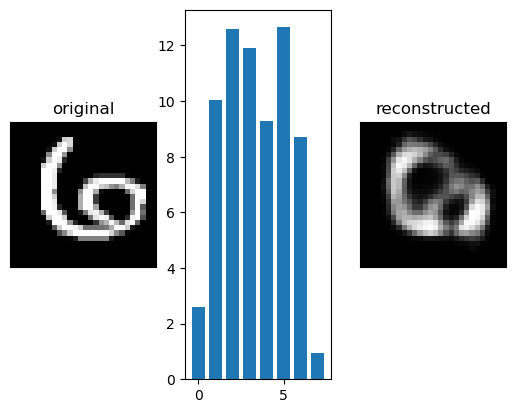

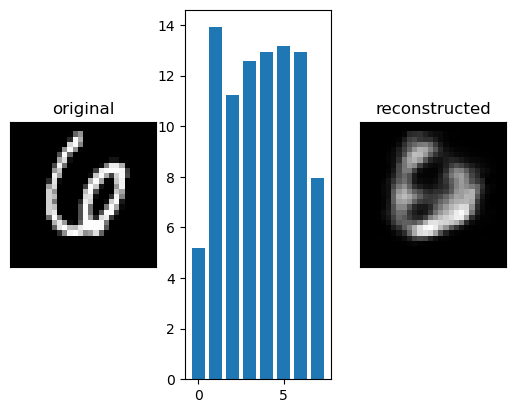

In [149]:
n = 6
for i in range(n):
  # display original
  ax = plt.subplot(1, 3, 1)
  plt.imshow(x_test_6[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(1, 3, 2)
  plt.bar( range(8),  encoded_imgs_6[i] )

  # display reconstruction
  ax = plt.subplot(1, 3, 3)
  plt.imshow(decoded_imgs_6[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()




feature 들만 비교해보면


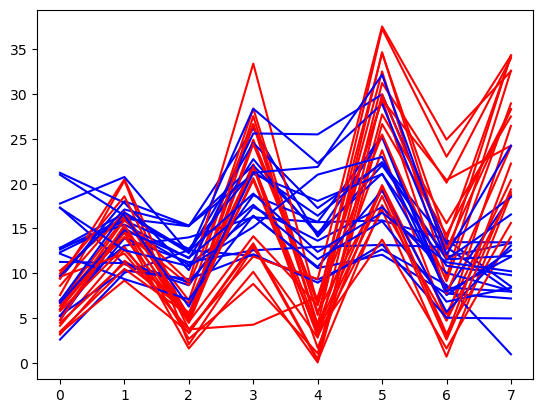

In [150]:
for i in range(20):
    plt.plot(encoded_imgs_1[i], 'red')
    plt.plot(encoded_imgs_6[i], 'blue')

숫자 1을 표현하는 데에는 주로 3, 5번째 Feature가 크게 나타나는 반면, 숫자 6을 나타나는 대에는 삳애적으로 0번째, 4번째 feature가 크게 나타남을 알 수 있다.


In [180]:
my_feature = np.array( [[ 5, 15, 5, 20, 15, 20, 30, 5 ]] )

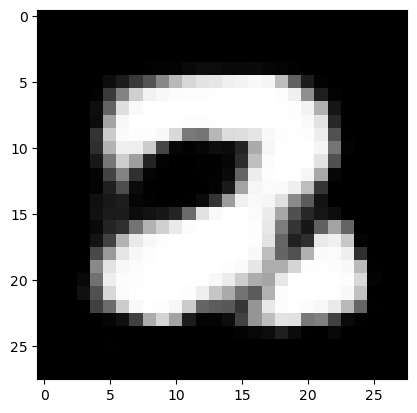

In [181]:
plt.imshow( autoencoder.decoder( my_feature )[0] )